In [1]:
import pandas as pd
import numpy as np
import fancyimpute
import matplotlib.pyplot as plt
import xgboost
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LassoCV, RidgeCV, SGDRegressor
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [2]:
path_train = '/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/Train_data.csv'
path_test = '/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/Test_data.csv'

In [3]:
var_names = ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
             'Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type',
             'Item_Outlet_Sales']

In [4]:
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

In [5]:
train[train.Outlet_Identifier=='OUT017'].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256


In [6]:
(train.isnull()).sum(axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [8]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [10]:
pd.crosstab(train.Outlet_Identifier, train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Identifier,,,,
OUT010,555,0,0,0
OUT013,0,932,0,0
OUT017,0,926,0,0
OUT018,0,0,928,0
OUT019,528,0,0,0
OUT027,0,0,0,935
OUT035,0,930,0,0
OUT045,0,929,0,0
OUT046,0,930,0,0


In [11]:
pd.crosstab(train.Outlet_Size, train.Outlet_Type)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,,,,
High,0,932,0,0
Medium,0,930,928,935
Small,528,1860,0,0


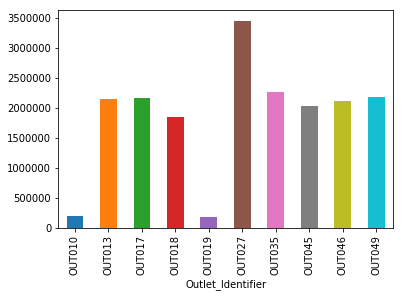

In [12]:
train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().plot(kind='bar')

In [13]:
pd.crosstab(train.Outlet_Identifier, train.Outlet_Establishment_Year)

Outlet_Establishment_Year,1985,1987,1997,1998,1999,2002,2004,2007,2009
Outlet_Identifier,,,,,,,,,
OUT010,0,0,0,555,0,0,0,0,0
OUT013,0,932,0,0,0,0,0,0,0
OUT017,0,0,0,0,0,0,0,926,0
OUT018,0,0,0,0,0,0,0,0,928
OUT019,528,0,0,0,0,0,0,0,0
OUT027,935,0,0,0,0,0,0,0,0
OUT035,0,0,0,0,0,0,930,0,0
OUT045,0,0,0,0,0,929,0,0,0
OUT046,0,0,930,0,0,0,0,0,0


In [14]:
pd.crosstab(train.Outlet_Size, train.Outlet_Establishment_Year)

Outlet_Establishment_Year,1985,1987,1997,1999,2004,2009
Outlet_Size,,,,,,
High,0,932,0,0,0,0
Medium,935,0,0,930,0,928
Small,528,0,930,0,930,0


In [15]:
((pd.crosstab(train.Item_Identifier, train.Outlet_Identifier,values=train.Item_Outlet_Sales, aggfunc='mean')).T)

Item_Identifier,DRA12,DRA24,DRA59,DRB01,DRB13,DRB24,DRB25,DRB48,DRC01,DRC12,...,NCZ05,NCZ06,NCZ17,NCZ18,NCZ29,NCZ30,NCZ41,NCZ42,NCZ53,NCZ54
Outlet_Identifier,,,,,,,,,,,,,,,,,,,,,
OUT010,283.6308,327.5736,185.0924,NaN,948.765,NaN,214.3876,157.1288,NaN,NaN,...,NaN,NaN,37.9506,NaN,503.3448,241.0196,NaN,711.0744,376.8428,324.9104
OUT013,2552.6772,4422.2436,555.2772,2466.789,3605.307,NaN,2036.6822,667.7974,591.2304,NaN,...,722.393,2790.3678,NaN,NaN,3020.0688,602.5490,876.1928,5451.5704,3203.1638,NaN
OUT017,2552.6772,1146.5076,2406.2012,NaN,3415.554,1853.5872,2358.2636,549.9508,1478.0760,3237.1196,...,NaN,2536.6980,1480.0734,6849.0846,NaN,964.0784,2503.4080,4029.4216,NaN,NaN
OUT018,850.8924,NaN,4442.2176,NaN,NaN,NaN,1715.1008,NaN,443.4228,NaN,...,NaN,5327.0658,493.3578,3805.0470,NaN,NaN,1877.5560,NaN,1884.2140,2599.2832
OUT019,NaN,491.3604,555.2772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.199,761.0094,NaN,761.0094,NaN,NaN,NaN,NaN,NaN,162.4552
OUT027,NaN,4913.6040,7033.5112,569.259,NaN,NaN,2787.0388,1296.3126,1034.6532,NaN,...,NaN,3297.7074,1480.0734,NaN,NaN,3374.2744,NaN,NaN,5652.6420,5523.4768
OUT035,992.7078,3439.5228,NaN,NaN,569.259,2162.5184,857.5504,746.3618,NaN,2475.4444,...,1238.388,NaN,NaN,6088.0752,NaN,2530.7058,1752.3856,4266.4464,NaN,NaN
OUT045,3829.0158,NaN,NaN,NaN,NaN,4170.5712,NaN,NaN,1133.1916,NaN,...,NaN,NaN,645.1602,1522.0188,1761.7068,2410.1960,2127.8968,NaN,NaN,2274.3728
OUT046,NaN,NaN,4442.2176,NaN,NaN,NaN,NaN,353.5398,492.6920,2285.0256,...,NaN,4566.0564,796.9626,5073.3960,1384.1982,NaN,NaN,NaN,NaN,4711.2008


In [16]:
pd.crosstab(train.Outlet_Identifier, train.Outlet_Size)

Outlet_Size,High,Medium,Small
Outlet_Identifier,,,
OUT013,932,0,0
OUT018,0,928,0
OUT019,0,0,528
OUT027,0,935,0
OUT035,0,0,930
OUT046,0,0,930
OUT049,0,930,0


In [17]:
from sklearn.metrics import pairwise_distances

In [18]:
D = pairwise_distances(((pd.crosstab(train.Item_Identifier, train.Outlet_Identifier,values=train.Item_Outlet_Sales, aggfunc='mean')).T).replace(np.nan,0), metric='euclidean')

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

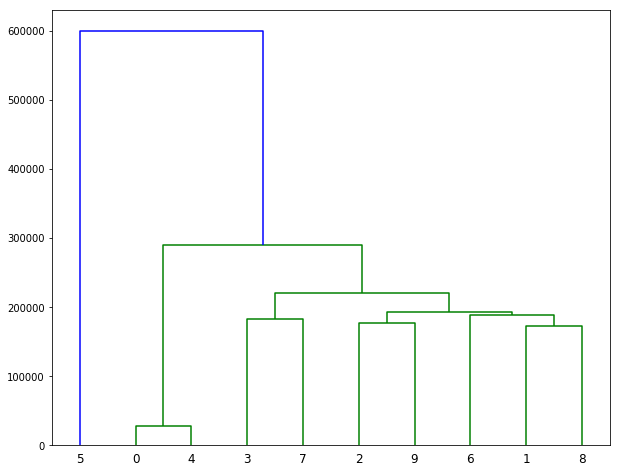

In [20]:
plt.figure(figsize=(10,8))
d=dendrogram(linkage(D,metric='cityblock',method='complete'))

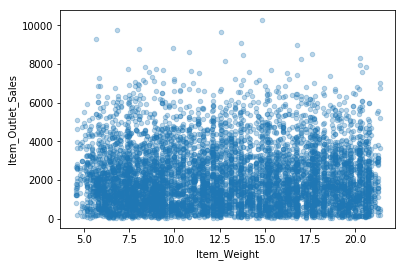

In [21]:
train.plot(x= 'Item_Weight',y='Item_Outlet_Sales', kind='scatter',alpha=0.3)

In [22]:
pd.crosstab(train.Item_Type, train.Outlet_Size)

Outlet_Size,High,Medium,Small
Item_Type,,,
Baking Goods,73,203,187
Breads,25,83,71
Breakfast,13,36,30
Canned,65,217,189
Dairy,80,218,198
Frozen Foods,92,274,249
Fruits and Vegetables,142,413,328
Hard Drinks,23,75,50
Health and Hygiene,61,170,136


In [23]:
pd.crosstab(train.Item_Type, train.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Type,,,,,,,,,,
Baking Goods,42,73,73,68,43,69,68,70,76,66
Breads,17,25,22,27,16,31,29,33,26,25
Breakfast,9,13,12,12,10,11,10,10,10,13
Canned,35,65,69,78,38,72,79,74,72,67
Dairy,43,80,74,73,49,67,71,69,78,78
Frozen Foods,54,92,106,92,49,89,92,81,108,93
Fruits and Vegetables,79,142,127,135,73,140,129,143,126,138
Hard Drinks,16,23,22,22,8,23,22,28,20,30
Health and Hygiene,37,61,61,58,30,60,50,55,56,52


In [24]:
pd.crosstab(train.Item_Fat_Content, train.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,,,,,,,,,,
LF,26,32,31,42,19,37,38,26,39,26
Low Fat,328,556,550,547,314,553,559,570,552,560
Regular,187,313,317,312,177,324,314,309,320,316
low fat,5,18,13,9,13,15,9,13,7,10
reg,9,13,15,18,5,6,10,11,12,18


In [25]:
train.Item_Fat_Content.replace(['LF','low fat','Low Fat'], value='Low_Fat',inplace=True)
train.Item_Fat_Content.replace(['Regular','reg'], value='Regular',inplace=True)

In [26]:
pd.crosstab(train.Item_Fat_Content, train.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Fat_Content,,,,,,,,,,
Low_Fat,359,606,594,598,346,605,606,609,598,596
Regular,196,326,332,330,182,330,324,320,332,334


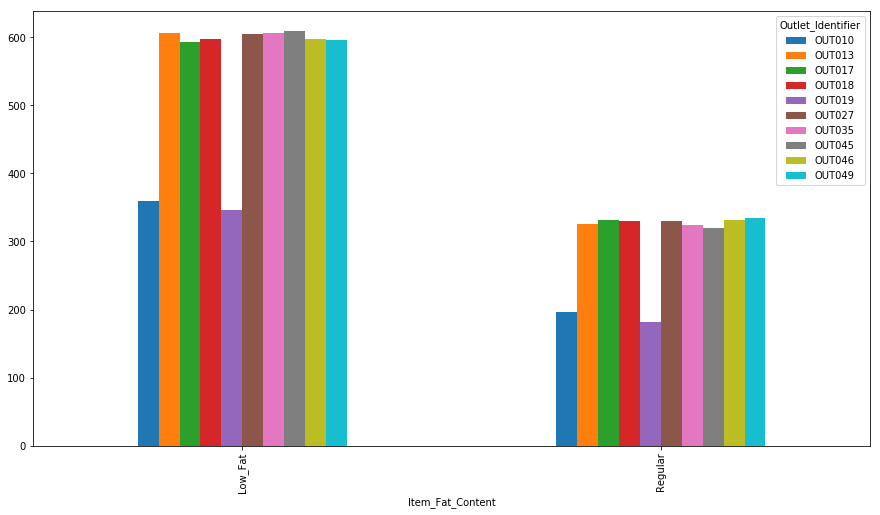

In [27]:
(pd.crosstab(train.Item_Fat_Content, train.Outlet_Identifier)).plot(kind='bar',figsize=(15,8))

In [28]:
train[train.Item_Identifier=='FDW58']['Item_Fat_Content']

2991    Low_Fat
8014    Low_Fat
Name: Item_Fat_Content, dtype: object

In [29]:
pd.crosstab(train.Outlet_Location_Type, train.Outlet_Identifier)

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Location_Type,,,,,,,,,,
Tier 1,0,0,0,0,528,0,0,0,930,930
Tier 2,0,0,926,0,0,0,930,929,0,0
Tier 3,555,932,0,928,0,935,0,0,0,0


In [30]:
pd.crosstab(train.Outlet_Location_Type, train.Item_Identifier,values=train.Item_MRP,aggfunc='mean').T

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Identifier,,,
DRA12,NaN,141.282067,142.448733
DRA24,164.186800,164.036800,164.053467
DRA59,184.959067,183.292400,185.817400
DRB01,187.753000,NaN,190.503000
DRB13,188.653000,190.753000,189.153000
DRB24,155.165600,154.232267,NaN
DRB25,NaN,106.943800,106.868800
DRB48,38.632200,38.732200,40.015533
DRC01,47.769200,49.469200,49.035867


In [31]:
pd.crosstab(train.Outlet_Identifier, train.Item_Identifier,values=train.Item_MRP,aggfunc='mean').T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Identifier,,,,,,,,,,
DRA12,143.0154,142.3154,140.3154,142.0154,NaN,NaN,141.9154,141.6154,NaN,NaN
DRA24,163.8868,162.4868,164.6868,NaN,163.2868,165.7868,163.3868,NaN,NaN,165.0868
DRA59,183.9924,185.9924,183.2924,186.5924,186.2924,186.6924,NaN,NaN,184.8924,183.6924
DRB01,NaN,190.9530,NaN,NaN,NaN,190.0530,NaN,NaN,NaN,187.7530
DRB13,189.0530,189.2530,191.1530,NaN,NaN,NaN,190.3530,NaN,NaN,188.6530
DRB24,NaN,NaN,153.1656,NaN,NaN,NaN,156.4656,153.0656,NaN,155.1656
DRB25,107.0938,107.9938,107.4938,106.2938,NaN,106.0938,106.3938,NaN,NaN,NaN
DRB48,40.9822,38.7822,37.4822,NaN,NaN,40.2822,39.9822,NaN,39.3822,37.8822
DRC01,NaN,50.3692,49.0692,48.2692,NaN,48.4692,NaN,49.8692,47.7692,NaN


In [32]:
train[(train.Item_Identifier=='DRA59') &(train.Outlet_Identifier=='OUT046')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1876,DRA59,8.27,Regular,0.127928,Soft Drinks,184.8924,OUT046,1997,Small,Tier 1,Supermarket Type1,4442.2176


In [33]:
pd.crosstab(train.Outlet_Identifier, train.Item_Identifier,values=train.Item_Weight,aggfunc='mean').T

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Item_Identifier,,,,,,,,,,
DRA12,11.600,11.600,11.600,11.600,NaN,NaN,11.600,11.600,NaN,NaN
DRA24,19.350,19.350,19.350,NaN,NaN,NaN,19.350,NaN,NaN,19.350
DRA59,8.270,8.270,8.270,8.270,NaN,NaN,NaN,NaN,8.270,8.270
DRB01,NaN,7.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.390
DRB13,6.115,6.115,6.115,NaN,NaN,NaN,6.115,NaN,NaN,6.115
DRB24,NaN,NaN,8.785,NaN,NaN,NaN,8.785,8.785,NaN,8.785
DRB25,12.300,12.300,12.300,12.300,NaN,NaN,12.300,NaN,NaN,NaN
DRB48,16.750,16.750,16.750,NaN,NaN,NaN,16.750,NaN,16.750,16.750
DRC01,NaN,5.920,5.920,5.920,NaN,NaN,NaN,5.920,5.920,NaN


In [34]:
train_new = train[['Item_Identifier','Item_Visibility','Item_MRP','Outlet_Identifier',
                   'Item_Outlet_Sales','Outlet_Location_Type']]

In [35]:
(train_new.isnull()).sum(axis=0)

Item_Identifier         0
Item_Visibility         0
Item_MRP                0
Outlet_Identifier       0
Item_Outlet_Sales       0
Outlet_Location_Type    0
dtype: int64

In [36]:
test_new = test[['Item_Identifier','Item_Visibility','Item_MRP','Outlet_Identifier','Outlet_Location_Type']]

In [37]:
(test_new.isnull()).sum(axis=0)

Item_Identifier         0
Item_Visibility         0
Item_MRP                0
Outlet_Identifier       0
Outlet_Location_Type    0
dtype: int64

In [38]:
def brk_Item_Identifier(x):
    try:
        L = re.findall("[a-zA-Z]",x)
        N = re.findall("\d+",x)
        L.append(N[0])
        return L
    except:
        import re
        L = re.findall("[a-zA-Z]",x)
        N = re.findall("\d+",x)
        L.append(N[0])
        return L

In [39]:
s_train = train_new.Item_Identifier.apply(brk_Item_Identifier)
Item_Identifier_broken_train = pd.DataFrame.from_items(zip(s_train.index,s_train.values)).T
Item_Identifier_broken_train.columns = ['Item_Part1','Item_Part2','Item_Part3','Item_Part4']
train_new_1 = pd.concat((train_new,Item_Identifier_broken_train),axis=1)
train_new_1.drop('Item_Identifier',axis=1,inplace=True)
train_new_1.Item_Part4 = train_new_1.Item_Part4.astype('category')

In [40]:
s_test = test_new.Item_Identifier.apply(brk_Item_Identifier)
Item_Identifier_broken_test = pd.DataFrame.from_items(zip(s_test.index,s_test.values)).T
Item_Identifier_broken_test.columns = ['Item_Part1','Item_Part2','Item_Part3','Item_Part4']
test_new_1 = pd.concat((test_new,Item_Identifier_broken_test),axis=1)
test_new_1.drop('Item_Identifier',axis=1,inplace=True)
test_new_1.Item_Part4 = test_new_1.Item_Part4.astype('category')

In [41]:
train_new_dummy = pd.get_dummies(train_new_1)
test_new_dummy = pd.get_dummies(test_new_1)

In [42]:
train_new_dummy.shape, test_new_dummy.shape

((8523, 108), (5681, 107))

In [43]:
#set(train_new_dummy.columns) - set(test_new_dummy.columns)

In [44]:
# test_extra_columns = pd.DataFrame(np.zeros((5681,16)),columns={'Item_Identifier_DRE49',
#  'Item_Identifier_FDA04',
#  'Item_Identifier_FDG24',
#  'Item_Identifier_FDG33',
#  'Item_Identifier_FDL10',
#  'Item_Identifier_FDL34',
#  'Item_Identifier_FDO19',
#  'Item_Identifier_FDO52',
#  'Item_Identifier_FDT07',
#  'Item_Identifier_FDU19',
#  'Item_Identifier_FDW13',
#  'Item_Identifier_FDX04',
#  'Item_Identifier_FDX20',
#  'Item_Identifier_NCL31',
#  'Item_Identifier_NCQ06',
#  'Item_Identifier_NCY18'})

In [45]:
#test_new_dummy_1=pd.concat((test_new_dummy,test_extra_columns),axis=1)

In [46]:
ridge = RidgeCV(alphas=(0.1,0.5,1.0,2.5,5.0,10.0,15.0,20.0),normalize=True, gcv_mode='auto', cv=10)

In [47]:
ridge.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])

RidgeCV(alphas=(0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 15.0, 20.0), cv=10,
    fit_intercept=True, gcv_mode='auto', normalize=True, scoring=None,
    store_cv_values=False)

In [48]:
ridge.alpha_

0.1

In [49]:
pred_ridge = ridge.predict(test_new_dummy)

In [50]:
pred_ridge[:10]

array([1875.23675461, 1498.62387749, 2200.71686661, 2696.05340109,
       5109.58493071, 2056.32109694,  564.33068187, 2620.21866244,
       1629.60591921, 3162.90720381])

In [51]:
#test_new.head()

In [52]:
#train_new[(train.Item_Identifier=='FWD14') & (train_new.Outlet_Identifier=='OUT017')]

In [53]:
output_ridge = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_ridge)})
#columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [54]:
output_ridge.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']

In [55]:
output_ridge.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/ridge_output.csv',index=False)

In [56]:
lasso = LassoCV(n_jobs=-1)

In [57]:
lasso.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=-1, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [58]:
pred_lasso = lasso.predict(X=test_new_dummy)

In [59]:
output_lasso = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_lasso)})
output_lasso.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
output_lasso.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/lasso_output.csv',index=False)

In [60]:
RF = RandomForestRegressor(n_estimators=1000,n_jobs=-1)

In [61]:
RF.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
pred_RF = RF.predict(X=test_new_dummy)

In [63]:
output_RF = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_RF)})
output_RF.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
output_RF.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/RF_output.csv',index=False)

In [64]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [65]:
tree_model = DecisionTreeRegressor(max_depth=5)

In [66]:
adaboost = AdaBoostRegressor(tree_model)
adaboost_CV = GridSearchCV(adaboost, param_grid={'n_estimators':[300,400,500,1000], 'learning_rate':[0.4,0.5,0.6,0.7,0.8]},n_jobs=-1)
adaboost_CV.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])
pred_adaboost = adaboost_CV.predict(X=test_new_dummy)

In [67]:
output_adaboost = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_adaboost)})
output_adaboost.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
output_adaboost.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/adaboost_output.csv',index=False)

In [68]:
bag_tree = BaggingRegressor(base_estimator=tree_model)
bag_tree_CV = GridSearchCV(bag_tree, param_grid={'n_estimators':[300,400,500,1000]}, n_jobs = -1)
bag_tree_CV.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])
pred_bag_tree = bag_tree_CV.predict(X=test_new_dummy)

In [69]:
output_bag_tree = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_bag_tree)})
output_bag_tree.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
output_bag_tree.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/bag_tree_output.csv',index=False)

In [70]:
# knn_model = KNeighborsRegressor(n_neighbors=10)
# bag_knn = BaggingRegressor(base_estimator=knn_model)
# bag_knn_CV = GridSearchCV(bag_knn, param_grid={'n_estimators':[300,400,500,1000]}, n_jobs = -1,cv=10)
# bag_knn_CV.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])
# pred_bag_knn = bag_knn_CV.predict(X=test_new_dummy)

In [71]:
# output_bag_tree = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_bag_tree)})
# output_bag_tree.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
# output_bag_tree.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/bag_tree_output.csv',index=False)

In [72]:
xgb_reg = xgboost.XGBRegressor()

In [73]:
#xgb_reg = BaggingRegressor(base_estimator=tree_model)
xgb_reg_CV = GridSearchCV(xgb_reg, param_grid={'n_estimators':[100,200,300,400,500]}, n_jobs = -1)
xgb_reg_CV.fit(X=train_new_dummy.drop('Item_Outlet_Sales',axis=1),y=train_new_dummy['Item_Outlet_Sales'])
pred_xgb_reg = xgb_reg_CV.predict(X=test_new_dummy)

In [74]:
output_xgb_reg = pd.DataFrame({'1':test_new.Item_Identifier,'2':test_new.Outlet_Identifier, '3':pd.Series(pred_xgb_reg)})
output_xgb_reg.columns= ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']
output_xgb_reg.to_csv('/home/subhasis/Dataset/Analytics Vidya Contests/Big Mart Sales 3/xgb_reg_output.csv',index=False)